## An Introduction to Multiple Linear Regression
In this session, we will introduce the multiple linear regression model
as an extension of the simple linear regression model, to accommodate
multiple predictors.

Inferences for the multiple linear regression model will be discussed.
Emphasis will be placed on interpreting regression coefficients.

## Objectives

Upon successful completion of this session, you should be able to:

-   Fit a multiple linear regression model to data.
-   Use summary statistics from the fit to describe the relationship
    between a response variable and a set of predictor variables.
-   Interpret model coefficients.

### Model definition

Simple linear regression is a useful approach for predicting a response
on the basis of a single predictor variable. However, in practice we
often have more than one predictor.

A multiple linear model takes the form:

$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p + \epsilon$

where $X_j$ represents the jth predictor and $\beta_j$ quantifies the
association between that variable and the response.

We interpret $\beta_j$ as the average effect on $Y$ of a one unit
increase in $X_j$, **holding all other predictors fixed.**

As was the case in the simple linear regression setting, the regression
coefficients $\beta_0, \beta_1, ..., \beta_p$ in the above equation are
unknown, and must be estimated.

Given estimates $\hat\beta_0, \hat\beta_1, ..., \hat\beta_p$, we can
make predictions using the formula

$\hat{y} = \hat\beta_0 + \hat\beta_1x_1 + \hat\beta_2x_2 + ... + \hat\beta_px_p$

The parameters are estimated using the same least squares approach that
we saw in the context of simple linear regression, where we choose
$\beta_0, \beta_1,...,\beta_p$ to minimize the sum of squared residuals,
RSS.

Note that the term ***linear*** in multiple linear regression means
linear in regression coefficients, such as:

$Y = \mu\{Y|X_1,X_2\} = \beta_0 + \beta_1X_1 + \beta_2X_2$

$Y = \mu\{Y|X_1\} = \beta_0 + \beta_1X_1 + \beta_2X^2_1$

$Y = \mu\{Y|X_1,X_2\} = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_1 X_2$

$Y = \mu\{Y|X_1,X_2\} = \beta_0 + \beta_1log(X_1) + \beta_2log(X_2)$

A non-linear regression model would take a form such as:

$Y = \mu\{Y|X_1\} = \beta_0 \cdot e^{\beta_1X_1}$

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot
import pandas as pd
import seaborn as sns

## Case Study: What factors affect an automobile's fuel efficiency? 
We will use the auto dataset to identify factors that affect fuel consumption. 


In [50]:
mpg = sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
#392 observations, 9 columns
auto.shape

We observe several continous and categorical variables. For example, the 'origin' variable is categorical, with three levels:

In [27]:
mpg.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

#### Qualitative predictors: dummy variables are smart!
We will create dummy (or indicator) variables that takes on possible numerical values (levels) of a factor.

For example, if a categorical variable has two levels, we can create one new dummy variable that takes the form:

$\mathrm{x_i} = \begin{cases} 1 & \text{if True} \\ 0 & \text{if False,} \end{cases}$

and use this variable as a predictor in the regression equation.

We always create *n-1* dummy variables for a categorical variale that has *n* levels. For the categorical variable 'origin', we create two dummy variables -- or rather python module `statsmodels` provides a way to create dummy variables for categorical variables, so we don’t have to do it manually.


We then generate a pairplot, for pairwise comparison of variables. 

/global/common/software/m4388/env/envs/hpc-bootcamp/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


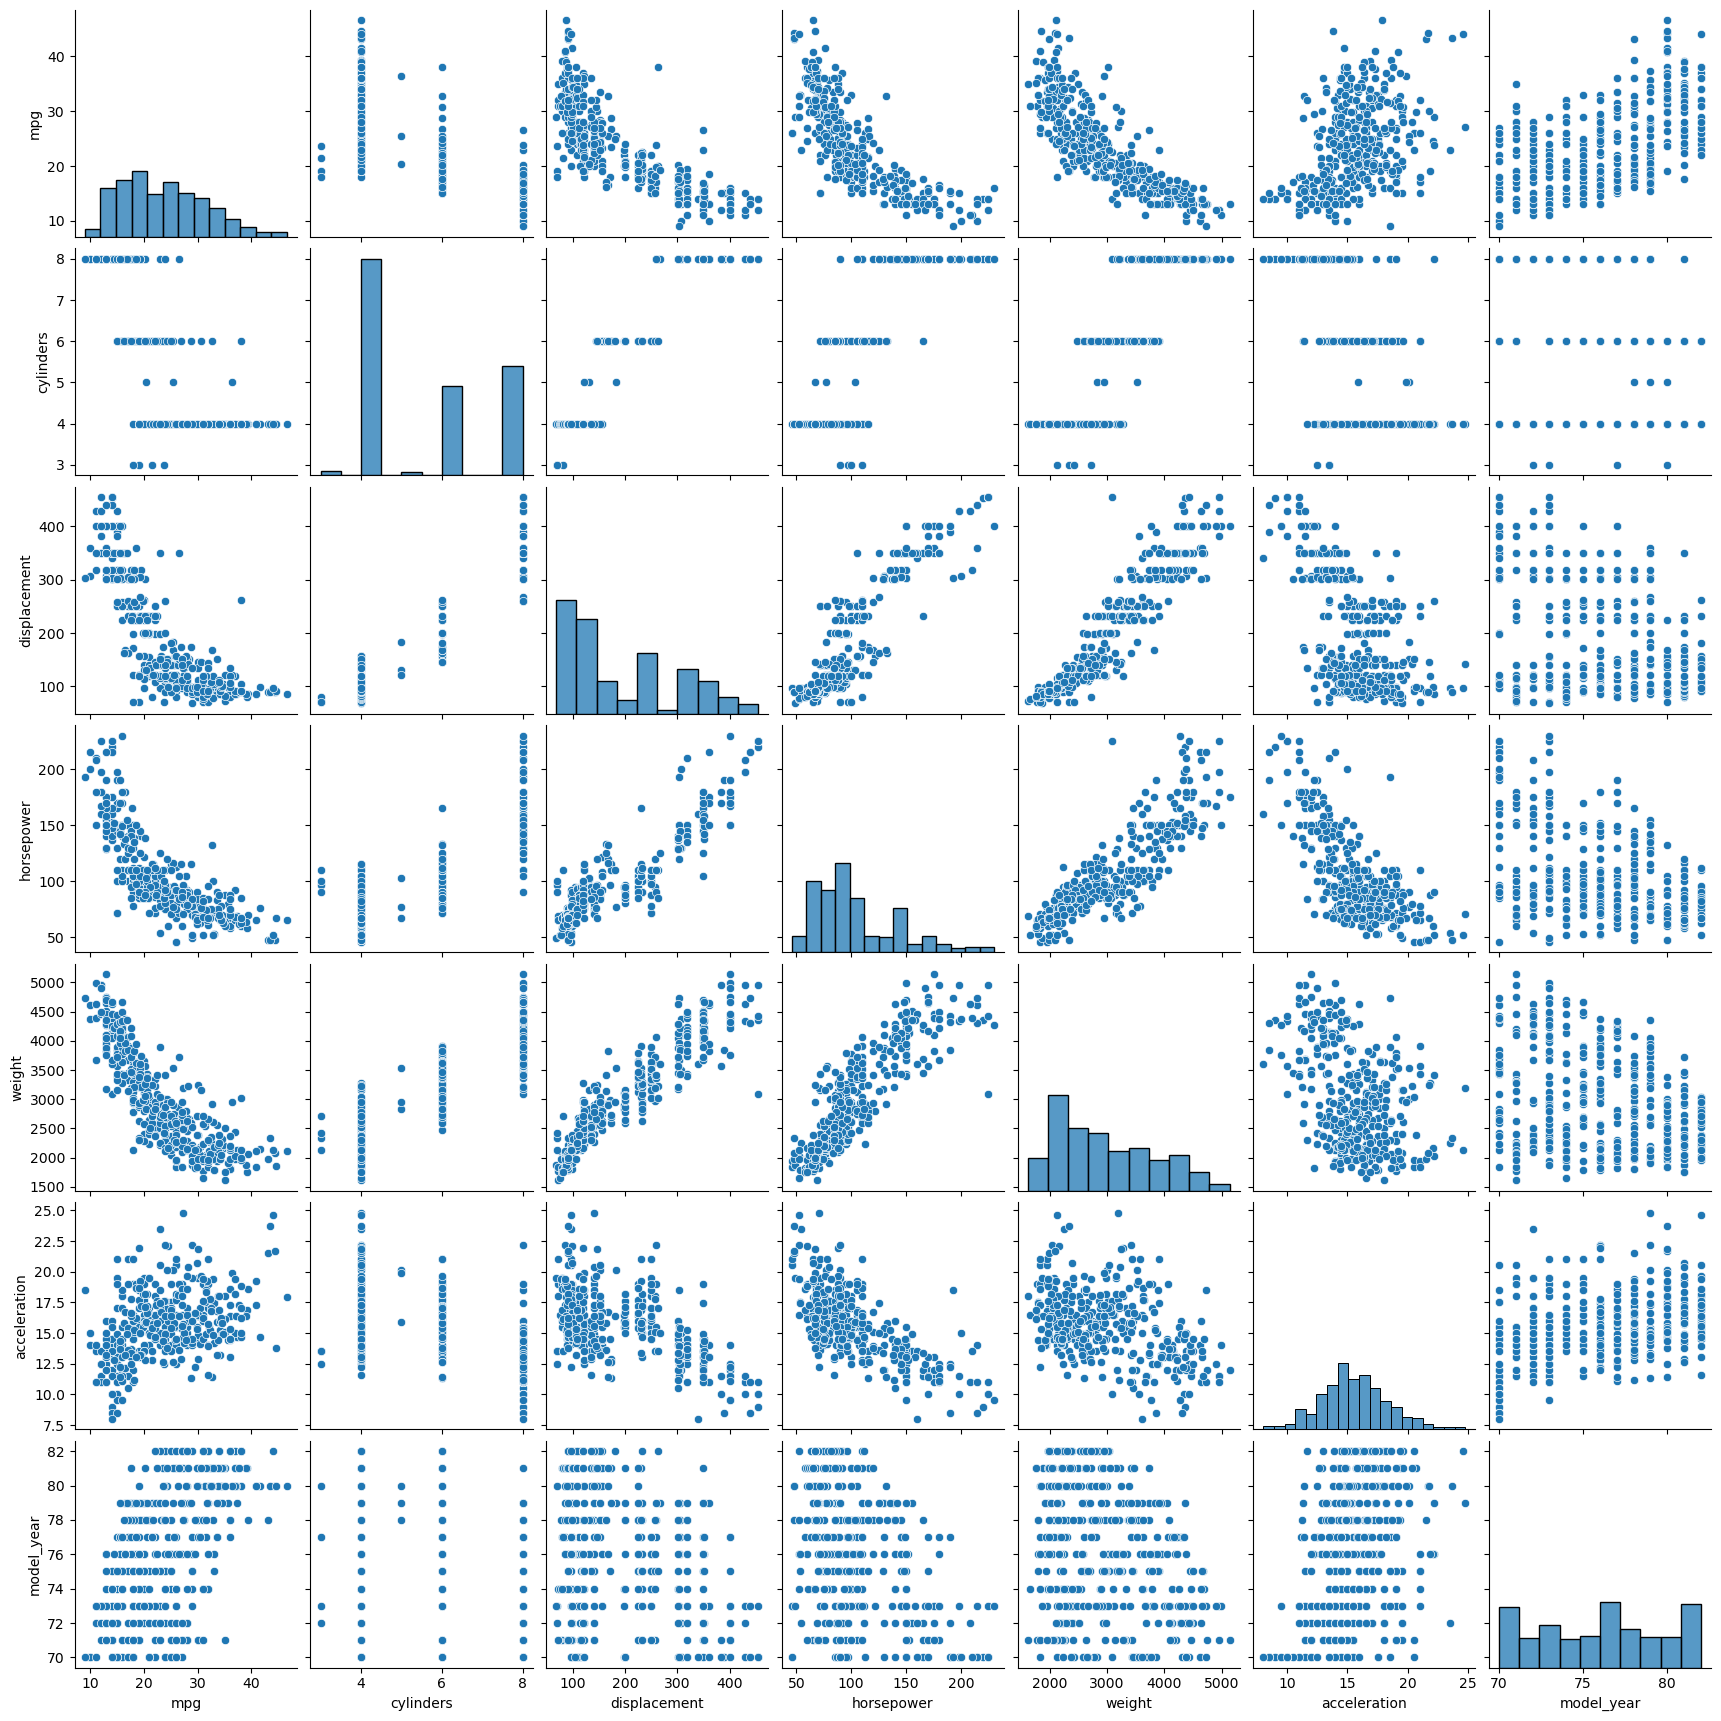

In [51]:
sns.pairplot(mpg)

We then fit a MLR, with 'origin' as a categorical variable

In [53]:
formula = 'mpg ~ horsepower + weight + C(origin) + model_year'
model = smf.ols(formula, data=mpg)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     350.3
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          5.21e-141
Time:                        11:24:13   Log-Likelihood:                -1025.7
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     386   BIC:                             2087.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -15.2661      4

The model has R-Squared value 0.817, meaning that 81.7\% of the variance in our dependent variable(mpg) can be explained by this model.

Based on the coefficient values, we can construct the regression equation:

**mpg = - 15.2661 - 0.0085 horsepower - 0.0056 weight + 0.7544 model_year + 0.3279 origin.japan - 1.9546 origin.usa**

This implies:

1. When horsepower increases by 1, mpg will decrease by 0.0085. However, notice how the effect of horsepower is not significant! 

2. When weight increases by 1 pound, mgp will decrease by 0.0056

3. If origin is Japan, mpg will increase by 0.3279(comparing to European cars)

4. If origin is USA, mpg will decrease by 1.9546(comparing to European cars)


### Optional: By how much does mpg change for a unit change in horsepower?  

Let us begin by investigating model assumptions to determine whether transforming the data is required.

#### Linearity

<Axes: xlabel='horsepower', ylabel='mpg'>

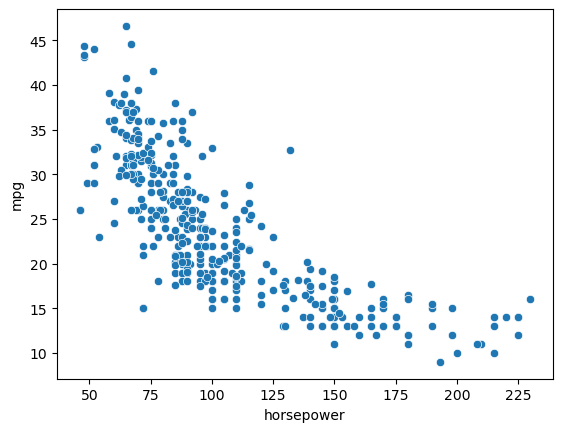

In [54]:
#Linearity
sns.scatterplot(data=mpg, x="horsepower", y="mpg")

#### Independence of errors and constant variance

<Axes: xlabel='predicted', ylabel='residuals'>

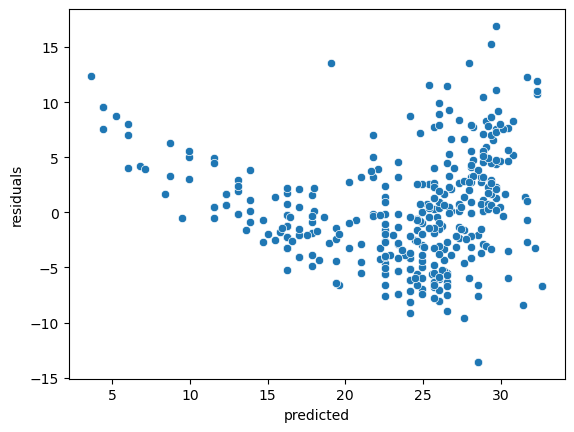

In [55]:
#Fit a SLR model to untransformed data
fit_mpg = smf.ols('mpg ~ horsepower', data=mpg).fit()

#Obtain predcicted (fits) values; and residuals (errors)
mpg['predicted'] = fit_mpg.predict(mpg['horsepower'])
mpg['residuals'] = fit_mpg.resid

sns.scatterplot(data=mpg, x="predicted", y="residuals")

#### Log transformation
The above plots suggest need for log transforming the data

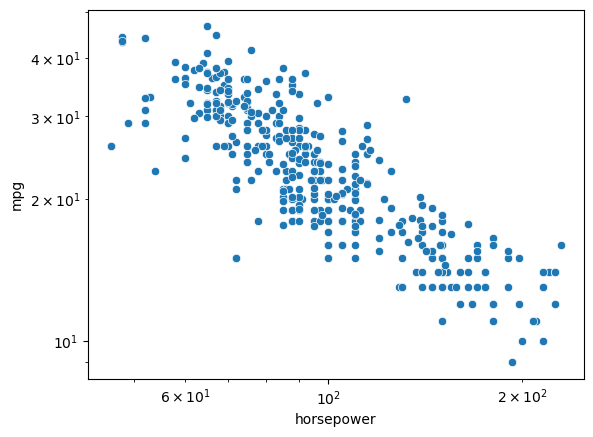

In [56]:
#Linearity
sns.scatterplot(data=mpg, x="horsepower", y="mpg")
plt.xscale('log')
plt.yscale('log')

<Axes: xlabel='predicted_log', ylabel='residuals_log'>

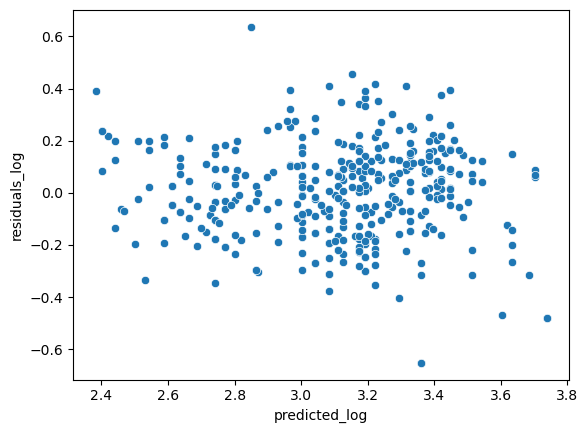

In [59]:
#Independence of errors and constant variance; after log transformation
mpg['mpg_log'] = np.log(mpg['mpg'])
mpg['horsepower_log'] = np.log(mpg['horsepower'])

#Fit a SLR model
fit_mpg_log = smf.ols('mpg_log ~ horsepower_log', data=mpg).fit()

#Obtain predcicted (fits) values; and residuals (errors)
mpg['predicted_log'] = fit_mpg_log.predict(mpg['horsepower_log'])
mpg['residuals_log'] = fit_mpg_log.resid

sns.scatterplot(data=mpg, x="predicted_log", y="residuals_log")

#### Interpretation of coefficients after log transformation
Recall that when values of the predictor and response variables are not log transformed, the estimated $\hat\beta_1$ is the average change in the response variable $Y$ for every unit increase in the predictor variable $X$.

However, transforming variables results in different interpretation of $\hat\beta_1$.

#### When response variable is transformed (log-linear model)

Given the model:

$ln(Y) =\mu\{ln(Y)|X\} =\beta_0 + \beta_1 X$

consider increasing $X$ by one unit.

If we call $Y_{new}$ the value of $Y$ after increasing $X$ by one unit,

then

$ln(Y_{new}) = \beta_0 + \beta_1 (X+1) = \beta_0 + \beta_1X + \beta_1$

$ln(Y_{new}) = ln(Y) + \beta_1$

$ln(Y_{new}) - ln(Y) = \beta_1$

$ln (\frac {Y_{new}}{Y}) = \beta_1$

Exponentiating on both sides yields:

$\frac {Y_{new}}{Y} = e^{\beta_1}$

Therefore, a linear change in the predictor variable is associated with **multiplicative change** in the response variable of **$e^{\beta_1}$**. Each one-unit increase in $X$ multiplies the expected value of $Y$ by $e^{\beta_1}$.

Alternatively, the percent change in $Y$ associated with a one-unit increase in $X$ is:

$100\times(e^{\beta_1}-1)$

#### When a predictor variable is transformed (linear-log model)

We describe the mean response $Y$ in terms of multiplicative changes of $X$, given the model:

$Y =\mu{\{Y|ln(X)}\} =\beta_0 + \beta_1 \cdot ln(X)$

If we **double** $X$, the the new value of $Y$ ($Y_{new}$) becomes:

$Y_{new} =\beta_0 + \beta_1 \cdot ln(2X)$

From the product property of logarithms:

$Y_{new} =\beta_0 + \beta_1 \cdot ln(2X) = \beta_0 + \beta_1 \times [ln(2) + ln(X)]$

and then:

$Y_{new} = \beta_0 + \beta_1 \cdot ln(X) + \beta_1 \cdot ln(2)$

$Y_{new} = Y + \beta_1 \cdot ln(2)$

$Y_{new} - Y = \beta_1 \cdot ln(2)$

Therefore, a doubling of $X$ is associated with a $\beta_1ln(2)$ change in the mean of $Y$

#### When both the predictor and response variables are transformed (log-log model)

The interpretation of $\beta_1$ is a combination of the previous two: a multiplicative change in the predictor variable is associated with multiplicative change in the response variable.

Given a log-log model:

$ln(Y) =\mu{\{ln(Y)|ln(X)}\} =\beta_0 + \beta_1 \cdot ln(X)$

if we double $X$, then the new value of $ln(Y)$, i.e $ln(Y_{new})$ becomes:

$ln(Y_{new}) = \beta_0 + \beta_1 \cdot ln(2X) = \beta_0 + \beta_1 \times [ln(2) + ln(X)] = \beta_0 + \beta_1 \cdot ln(X) + \beta_1 \cdot ln(2)$

$ln(Y_{new}) = ln(Y) + \beta_1 \cdot ln(2)$

$ln(Y_{new}) - ln(Y) = \beta_1 \cdot ln(2)$

$ln(\frac {Y_{new}}{Y}) = \beta_1 \cdot ln(2)$

Exponentiating on both sides yields:

$\frac {Y_{new}}{Y} = e^{\beta_1 \cdot ln(2)} = 2^{\beta_1}$

Therefore, a doubling of $X$ is associated with a multiplicative change in the response variable of $2^{\beta_1}$.

#### Mpg Vs Horsepower: Interpretation of model coefficient after log transformation

In [60]:
print(fit_mpg_log.summary())

                            OLS Regression Results                            
Dep. Variable:                mpg_log   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     1016.
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          1.13e-110
Time:                        14:16:40   Log-Likelihood:                 118.52
No. Observations:                 392   AIC:                            -233.0
Df Residuals:                     390   BIC:                            -225.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.9606      0.121     57.

We now have a significant estimate for the (negative) effect of (log) horsepower on mpg

Since this is a log-log model, we interpret $\beta_1$ in terms of multiplicative changes in both $X$ and $Y$.

**Doubling** horsepower multiples mpg by $2^{\beta_1} = 2^{-0.8418} = 0.5579$, i.e. reduces mpg by about $44.21\%$ ($1-0.5579 = 0.4421$)